In [907]:
import pandas as pd
import numpy as np

import seaborn as sns; sns.set()
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 9) # (w, h)

"Задача: поиск корреляции между трафиком на сайте и продаж в оффлайн аптеке <br>
В приложении - выгрузка по продажам с Еаптека.ру<br>
Начало периода: 01.01.2018<br>
Конец периода: 30.09.2019<br>
За этот же период выгружены даные по трафику в разрезе месяцев из Google Analytics.<br>
Наложите данные по трафику на реальные данные о продажах.<br>
Есть ли корреляция?<br>
Как считаете - какая у лекарственных препаратов может быть сезонность? Она наблюдается в данных о продажах или в трафике?<br>
Возможно ли на основе данных за 2 года спрогнозировать продажи или трафик на 2020ый год?"<br>

In [89]:
df_trafic = pd.read_csv('site_trafic.csv')
df_trafic=df_trafic.drop(columns=['Unnamed: 0'])
df_trafic

,month,year,sessions
0,1,2018,22758
1,2,2018,24773
2,3,2018,24530
3,4,2018,21733
4,5,2018,21862
5,6,2018,21905
6,7,2018,21401
7,8,2018,22568
8,9,2018,32873
9,10,2018,55507


In [413]:
df_sales = pd.read_excel('sales_eapteka.xlsx')
df_sales=df_sales.drop(index=[0,1,2,3,4,6],columns=['Unnamed: 1','Unnamed: 2','Unnamed: 3'])

df_sales=df_sales.drop(index=[109]).reset_index().drop(columns=['index'])

df_sales=df_sales.rename(columns={'Unnamed: 0':'Название товара'})
df_sales=df_sales.rename(columns={'Unnamed: 25':'Итого'})
df_sales.loc[0,'Название товара']='месяц/год'
df_sales.loc[1,'Название товара']='Сумма продаж за месяц'

old_names=list(df_sales)[1:22]
new_names=list(df_trafic.index)
for i in range(len(old_names)):
    df_sales=df_sales.rename(columns={str(old_names[i]):str(new_names[i])})
df_sales

,Название товара,0,1,2,3,4,5,6,7,8,...,12,13,14,15,16,17,18,19,20,Итого
0,месяц/год,янв. 2018,февр. 2018,март 2018,апр. 2018,май 2018,июнь 2018,июль 2018,авг. 2018,сент. 2018,...,янв. 2019,февр. 2019,март 2019,апр. 2019,май 2019,июнь 2019,июль 2019,авг. 2019,сент. 2019,Итого
1,Сумма продаж за месяц,10648,10725,11437,10358,9535,7551,7613,9043,9519,...,10808,10732,10722,9259,6708,6281,6759,6928,8326,196202
2,Аир корневища 75г,45,65,51,32,37,24,59,28,33,...,31,36,28,40,31,29,18,30,25,763
3,Алтей корни 75г,13,19,23,19,17,12,22,28,11,...,12,16,8,13,12,6,12,7,15,321
4,Багульник болотный побеги 50г,17,26,34,22,18,9,12,14,15,...,22,24,18,12,7,4,6,14,19,383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Чистотел трава 50г,106,96,111,102,88,35,51,44,44,...,52,99,49,59,43,72,50,57,43,1369
99,Шалфей листья 50г,228,219,190,160,144,133,119,103,131,...,125,125,139,99,63,80,95,113,108,2891
100,Шиповник плоды низковитаминные 50г,NaN,NaN,NaN,NaN,NaN,5,15,31,30,...,55,53,43,56,20,17,16,22,26,491
101,Эвкалипт прутовидный листья 75г,80,79,80,53,55,41,50,52,55,...,66,96,66,55,32,20,46,57,71,1296


In [414]:
df_sales=df_sales.T
df_sales

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
Название товара,месяц/год,Сумма продаж за месяц,Аир корневища 75г,Алтей корни 75г,Багульник болотный побеги 50г,Береза почки 50г,Бессмертник песчаный цветки 30г,Боярышник плоды 75г,Брусника листья 50г,Валериана корневища с корнями 50г,...,"Фп Шалфей листья 20х1,5г","Фп Шиповник плоды 20х2,0г",Чабрец трава 50г,Чага (березовый гриб) 50г,Череда трава 50г,Чистотел трава 50г,Шалфей листья 50г,Шиповник плоды низковитаминные 50г,Эвкалипт прутовидный листья 75г,Эрва шерстистая трава 30г
0,янв. 2018,10648,45,13,17,62,88,67,85,89,...,49,107,55,633,133,106,228,NaN,80,52
1,февр. 2018,10725,65,19,26,104,128,107,63,80,...,70,146,68,538,141,96,219,NaN,79,66
2,март 2018,11437,51,23,34,99,122,76,65,104,...,107,154,44,512,130,111,190,NaN,80,59
3,апр. 2018,10358,32,19,22,68,74,76,76,62,...,69,101,42,515,104,102,160,NaN,53,48
4,май 2018,9535,37,17,18,53,68,48,55,89,...,61,75,38,1390,110,88,144,NaN,55,54
5,июнь 2018,7551,24,12,9,43,48,60,49,95,...,49,75,24,796,65,35,133,5,41,28
6,июль 2018,7613,59,22,12,49,38,30,49,93,...,33,62,32,1031,130,51,119,15,50,64
7,авг. 2018,9043,28,28,14,82,56,46,113,72,...,49,72,44,1713,98,44,103,31,52,34
8,сент. 2018,9519,33,11,15,44,83,77,44,94,...,89,101,34,1327,136,44,131,30,55,37


In [415]:
# Добавили столбик с травиком
df_sales.loc['0':'20',"Трафик"]=df_trafic[['sessions']].values


In [425]:
# Формируем датасет для корреляции
df_to_corr=df_sales
df_to_corr.loc['Название товара','Трафик']='Трафик'
df_to_corr = df_to_corr.set_axis(df_to_corr.loc[['Название товара']].values[0], axis=1, inplace=False)
df_to_corr=df_to_corr.drop(index=['Название товара','Итого'],columns=['месяц/год'])
df_to_corr=df_to_corr.fillna(0)
df_to_corr

,Сумма продаж за месяц,Аир корневища 75г,Алтей корни 75г,Багульник болотный побеги 50г,Береза почки 50г,Бессмертник песчаный цветки 30г,Боярышник плоды 75г,Брусника листья 50г,Валериана корневища с корнями 50г,Девясил корневища и корни 50г,...,"Фп Шиповник плоды 20х2,0г",Чабрец трава 50г,Чага (березовый гриб) 50г,Череда трава 50г,Чистотел трава 50г,Шалфей листья 50г,Шиповник плоды низковитаминные 50г,Эвкалипт прутовидный листья 75г,Эрва шерстистая трава 30г,Трафик
0,10648,45,13,17,62,88,67,85,89,54,...,107,55,633,133,106,228,0,80,52,22758.0
1,10725,65,19,26,104,128,107,63,80,33,...,146,68,538,141,96,219,0,79,66,24773.0
2,11437,51,23,34,99,122,76,65,104,36,...,154,44,512,130,111,190,0,80,59,24530.0
3,10358,32,19,22,68,74,76,76,62,28,...,101,42,515,104,102,160,0,53,48,21733.0
4,9535,37,17,18,53,68,48,55,89,32,...,75,38,1390,110,88,144,0,55,54,21862.0
5,7551,24,12,9,43,48,60,49,95,42,...,75,24,796,65,35,133,5,41,28,21905.0
6,7613,59,22,12,49,38,30,49,93,32,...,62,32,1031,130,51,119,15,50,64,21401.0
7,9043,28,28,14,82,56,46,113,72,31,...,72,44,1713,98,44,103,31,52,34,22568.0
8,9519,33,11,15,44,83,77,44,94,35,...,101,34,1327,136,44,131,30,55,37,32873.0
9,10881,38,22,12,68,72,71,65,92,64,...,122,78,627,136,58,166,46,100,41,55507.0


In [430]:
# Самое главное. Есть ли корр Трафика и Продаж за месяц
df_to_corr[['Сумма продаж за месяц','Трафик']].corr()

,Сумма продаж за месяц,Трафик
Сумма продаж за месяц,1.000000,-0.326002
Трафик,-0.326002,1.000000


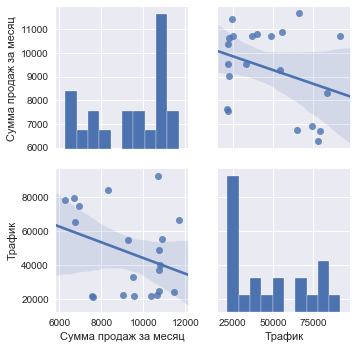

In [1332]:
# График кор-ии
sns_plot =sns.pairplot(df_to_corr[['Сумма продаж за месяц','Трафик']],kind="reg")
sns_plot.savefig('img_RW/аптека/кореляция')
plt.show()

Нет положительной корреляции

Значение корр -0,32. 

Продажи не зависят от трафика

Посмотрим кореляцию товаров между собой проверим на сопутствующие товары

In [509]:
df_to_corr=df_to_corr.fillna(0)
corr_matrix=df_to_corr.corr()
corr_matrix

,Сумма продаж за месяц,Аир корневища 75г,Алтей корни 75г,Багульник болотный побеги 50г,Береза почки 50г,Бессмертник песчаный цветки 30г,Боярышник плоды 75г,Брусника листья 50г,Валериана корневища с корнями 50г,Девясил корневища и корни 50г,...,"Фп Шиповник плоды 20х2,0г",Чабрец трава 50г,Чага (березовый гриб) 50г,Череда трава 50г,Чистотел трава 50г,Шалфей листья 50г,Шиповник плоды низковитаминные 50г,Эвкалипт прутовидный листья 75г,Эрва шерстистая трава 30г,Трафик
Сумма продаж за месяц,1.000000,0.431743,0.423152,0.770838,0.817210,0.817171,0.794817,0.492655,0.706197,0.532003,...,0.807381,0.443421,0.170754,0.792258,0.461604,0.753744,0.190775,0.790952,0.129575,-0.326002
Аир корневища 75г,0.431743,1.000000,0.435029,0.447277,0.633842,0.583089,0.473570,0.130480,0.453140,0.072783,...,0.305652,0.222247,0.160049,0.637976,0.495897,0.594370,-0.263364,0.389731,0.509374,-0.352514
Алтей корни 75г,0.423152,0.435029,1.000000,0.333701,0.639265,0.283220,0.282009,0.450015,0.373575,0.027685,...,0.126200,0.119325,0.484421,0.427857,0.224167,0.373245,-0.093266,0.411973,-0.090818,-0.468024
Багульник болотный побеги 50г,0.770838,0.447277,0.333701,1.000000,0.731558,0.720826,0.668161,0.372835,0.592432,0.350846,...,0.623493,0.160817,0.071270,0.711143,0.359801,0.609824,-0.031235,0.564564,0.211171,0.009572
Береза почки 50г,0.817210,0.633842,0.639265,0.731558,1.000000,0.817253,0.743218,0.561642,0.533942,0.279530,...,0.652187,0.391723,0.223263,0.699388,0.519390,0.703870,-0.028037,0.610084,0.284366,-0.397217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Шалфей листья 50г,0.753744,0.594370,0.373245,0.609824,0.703870,0.758456,0.656080,0.413884,0.587546,0.321209,...,0.480187,0.453879,0.098977,0.705947,0.581354,1.000000,-0.309888,0.666158,0.198357,-0.428064
Шиповник плоды низковитаминные 50г,0.190775,-0.263364,-0.093266,-0.031235,-0.028037,-0.141334,-0.020704,-0.090861,0.104725,0.567578,...,0.476217,0.188089,-0.183103,0.100342,-0.411013,-0.309888,1.000000,0.277503,-0.182513,0.291577
Эвкалипт прутовидный листья 75г,0.790952,0.389731,0.411973,0.564564,0.610084,0.652066,0.644349,0.251363,0.673535,0.545581,...,0.642318,0.631590,-0.058768,0.539970,0.400178,0.666158,0.277503,1.000000,-0.125548,-0.178493
Эрва шерстистая трава 30г,0.129575,0.509374,-0.090818,0.211171,0.284366,0.309355,0.099025,0.045779,-0.074222,-0.067980,...,0.216821,0.093820,-0.103973,0.399494,0.352057,0.198357,-0.182513,-0.125548,1.000000,-0.030435


In [641]:
# Массив датафремов коррелирующих товаров
corr_matrix_max=corr_matrix[1:102].where(corr_matrix>0.8).where(corr_matrix!=1)
s_goods_array=[]
for column in list(corr_matrix_max)[1:102]:
    buf=corr_matrix_max[[column]].dropna()
    if(len(buf)<=5 & len(buf)>0):
        s_goods_array.append(buf)      

In [642]:
# Сделала словарь ключ название товара и к нему названия коррелирующих товаров
s_goods_dict={}
for df in s_goods_array:
    buf_dict={list(df)[0]:df.index.values}
    s_goods_dict.update(buf_dict)
s_goods_dict

{'Багульник болотный побеги 50г': array(['Фп Липа цветки 20x1,5г'], dtype=object),
 'Боярышник плоды 75г': array(['Бессмертник песчаный цветки 30г'], dtype=object),
 'Крапива листья 50г': array(['Фп Зверобой трава 20x1,5г', 'Фп Мята перечная листья 20x1,5г',
        'Фп Сб. Фитоседан №3 (Успокоительный сбор №3) 20х2,0г',
        'Фп Тысячелистник трава 20x1,5г'], dtype=object),
 'Крушина кора 50г': array(['Фп Шиповник плоды 20х2,0г'], dtype=object),
 'Мята перечная листья 50г': array(['Зверобой трава 50г'], dtype=object),
 'Ноготки цветки 50г': array(['Фп Череда трава 20х1,5г'], dtype=object),
 'Подорожник большой листья 50г': array(['Кукуруза столбики с рыльцами 40г'], dtype=object),
 'Ромашка цветки вн 50г': array(['Зверобой трава 50г', 'Фп Липа цветки 20x1,5г',
        'Фп Сб. Грудной №4 20x2,0г', 'Эвкалипт прутовидный листья 75г'],
       dtype=object),
 'Сб. Фитогастрол (Желудочно-кишечный сбор) 50г': array(['Сб. Фитоседан №3 (Успокоительный сбор №3) 50г'], dtype=object),
 'Сб. Фи

In [659]:
for i in s_goods_dict.keys():
    print('Товар: \n',i)
    print('Сопутствующие ему: ')
    for j in range(len(s_goods_dict[i])):
        print(j+1,s_goods_dict[i][j])
    print('\n')

Товар: 
 Багульник болотный побеги 50г
Сопутствующие ему: 
1 Фп Липа цветки 20x1,5г


Товар: 
 Боярышник плоды 75г
Сопутствующие ему: 
1 Бессмертник песчаный цветки 30г


Товар: 
 Крапива листья 50г
Сопутствующие ему: 
1 Фп Зверобой трава 20x1,5г
2 Фп Мята перечная листья 20x1,5г
3 Фп Сб. Фитоседан №3 (Успокоительный сбор №3) 20х2,0г
4 Фп Тысячелистник трава 20x1,5г


Товар: 
 Крушина кора 50г
Сопутствующие ему: 
1 Фп Шиповник плоды 20х2,0г


Товар: 
 Мята перечная листья 50г
Сопутствующие ему: 
1 Зверобой трава 50г


Товар: 
 Ноготки цветки 50г
Сопутствующие ему: 
1 Фп Череда трава 20х1,5г


Товар: 
 Подорожник большой листья 50г
Сопутствующие ему: 
1 Кукуруза столбики с рыльцами 40г


Товар: 
 Ромашка цветки вн 50г
Сопутствующие ему: 
1 Зверобой трава 50г
2 Фп Липа цветки 20x1,5г
3 Фп Сб. Грудной №4 20x2,0г
4 Эвкалипт прутовидный листья 75г


Товар: 
 Сб. Фитогастрол (Желудочно-кишечный сбор) 50г
Сопутствующие ему: 
1 Сб. Фитоседан №3 (Успокоительный сбор №3) 50г


Товар: 
 Сб. Фитос

Нужно отследить сезонность.
Мб через график


In [625]:
data_to_plot=(data_to_plot-data_to_plot.min())/(data_to_plot.max()-data_to_plot.min())

In [626]:
data_to_plot

,1,Трафик
0,0.810655,0.019131
1,0.824949,0.0475385
2,0.957119,0.0441127
3,0.756822,0.00468054
4,0.604047,0.00649918
5,0.235753,0.0071054
6,0.247262,0
7,0.512716,0.0164524
8,0.601077,0.161732
9,0.853908,0.480827


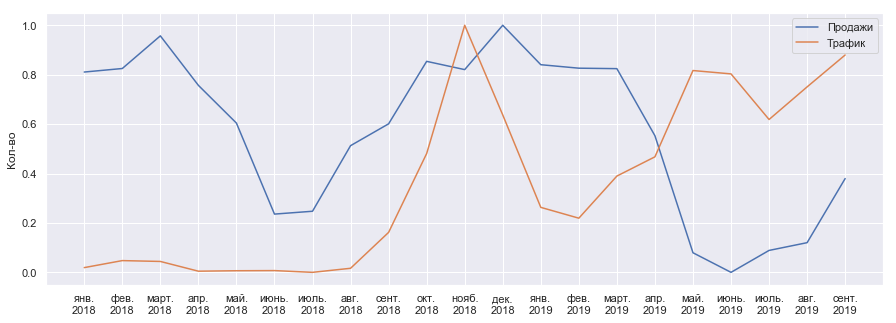

In [1161]:
data_to_plot=df_sales[[1,'Трафик']].loc['0':'20']
# Нормализация в диапазон от 0 до 1
data_to_plot=(data_to_plot-data_to_plot.min())/(data_to_plot.max()-data_to_plot.min())

fig, axes = plt.subplots(figsize = (15, 5))

x_to_plot=['янв.\n2018', 'фев.\n2018',
                      'март.\n2018','апр.\n2018','май.\n2018',
                      'июнь.\n2018','июль.\n2018','авг.\n2018',
                      'сент.\n2018','окт.\n2018','нояб.\n2018','дек.\n2018',
                     'янв.\n2019', 'фев.\n2019',
                      'март.\n2019','апр.\n2019','май.\n2019',
                      'июнь.\n2019','июль.\n2019','авг.\n2019','сент.\n2019']

# Продажи
y_to_plot=data_to_plot[1]
# Трафик
y1_to_plot=data_to_plot['Трафик']

axes.plot(x_to_plot,y_to_plot)
axes.plot(x_to_plot,y1_to_plot)

axes.set_ylabel('Кол-во');
plt.legend(labels=['Продажи','Трафик']);
fig.savefig('img_RW/аптека/тренд продаж и трафика')

In [719]:
# Медианы продаж товаров. Какой пользуется спросом больше
df_median_goods=pd.DataFrame(columns=['name','median'])
df_median_goods['name']=df_sales.loc['Название товара'][2:103].values
df_median_goods['median']=df_sales[list(df_sales)[2:103]].loc['0':'20'].median().reset_index().drop(columns='index')

In [1182]:
# Наиболее популярное и продаваемое
top5=df_median_goods.sort_values(by='median',ascending=False).head(5)

# Наименее популярное и продаваемое
last5=df_median_goods.sort_values(by='median',ascending=False).tail(5)

print(last5)
print(top5)

                                            name  median
65                     Фп Ольха соплодия 20х1,5г     8.0
56               Фп Золототысячник трава 20х1,5г     8.0
48                    Фп Бадан корневища 20x1,5г     6.5
30  Сб. Ингафитол №1 (сбор для ингаляций №1) 50г     6.0
29                         Сб. Желудочный №3 75г     6.0
                         name  median
71  Фп Ромашка цветки 20x1,5г  1675.0
94  Чага (березовый гриб) 50г   512.0
74  Фп Сб. Грудной №4 20x2,0г   450.0
25      Ромашка цветки вн 50г   357.0
73   Фп Сб. Бруснивер 20x2,0г   297.0


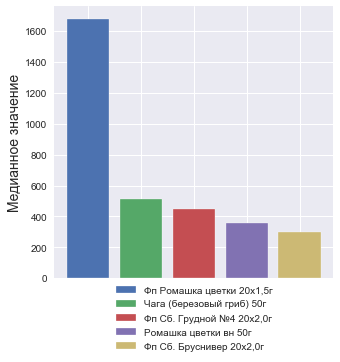

In [1323]:
fig, axes = plt.subplots(figsize = (5, 5))

x=top5.name.values
y=top5['median'].values

labels=[]
for i in x:
    labels.append(i)
labels

for i in range(len(x)):
    axes.bar(x[i],y[i],color = sns.color_palette()[i],label=labels[i])

#  Устанавливаем позиции тиков:
axes.set_xticks(range(len(last5)))
# Создаем пустой массив чтоб перекрыть подписи столбцов по оси Х    
set_x_ax=[]
for i in range(len(last5)):
    set_x_ax.append(" ")
# Перекрываем
axes.set_xticklabels(set_x_ax)

axes.set_ylabel('Медианное значение',fontsize=14)

axes.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30))

fig.savefig('img_RW/аптека/популярные товары')
plt.show();

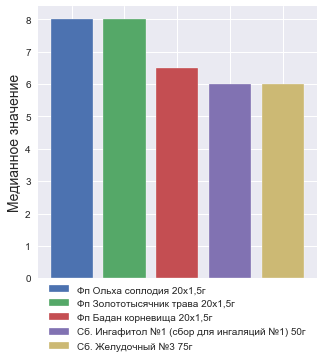

In [1324]:
fig, axes = plt.subplots(figsize = (5, 5))
x=last5.name.values
y=last5['median'].values

labels=[]
for i in x:
    labels.append(i)
labels

for i in range(len(x)):
    axes.bar(x[i],y[i],color = sns.color_palette()[i],label=labels[i])

#  Устанавливаем позиции тиков:
axes.set_xticks(range(len(last5)))
# Создаем пустой массив чтоб перекрыть подписи столбцов по оси Х    
set_x_ax=[]
for i in range(len(last5)):
    set_x_ax.append(" ")
# Перекрываем
axes.set_xticklabels(set_x_ax)

axes.set_ylabel('Медианное значение',fontsize=14)

axes.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30))
fig.savefig('img_RW/аптека/НЕ популярные товары')

plt.show();

Сезонность для трех самых популярных товаров

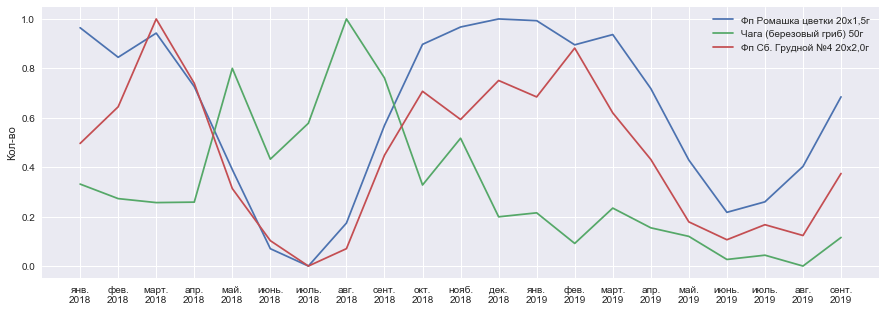

In [1337]:
top5=top5.head(3)
data_to_paint_popular=df_to_corr[top5['name'].values]
# Нормализация в диапазон от 0 до 1
data_to_paint_popular=(data_to_paint_popular-data_to_paint_popular.min())/(data_to_paint_popular.max()-data_to_paint_popular.min())

fig, axes = plt.subplots(figsize = (15, 5))
axes.plot(data_to_paint_popular)

axes.set_xticks(range(len(y_to_plot)))
#  Устанавливаем подписи тиков
axes.set_xticklabels(['янв.\n2018', 'фев.\n2018',
                      'март.\n2018','апр.\n2018','май.\n2018',
                      'июнь.\n2018','июль.\n2018','авг.\n2018',
                      'сент.\n2018','окт.\n2018','нояб.\n2018','дек.\n2018',
                     'янв.\n2019', 'фев.\n2019',
                      'март.\n2019','апр.\n2019','май.\n2019',
                      'июнь.\n2019','июль.\n2019','авг.\n2019','сент.\n2019'])

axes.set_ylabel('Кол-во');
plt.legend(labels=top5['name'].values);
fig.savefig('img_RW/аптека/тренд трех самых популярных товаров')

ПОРГНОЗИРУЕМ ПРОДАЖИ (по среднему значению)

In [1147]:
df_pred=data_prod

In [1121]:
month=list(range(1,13))+list(range(1,10))
df_pred['month']=month
df_pred

,Продажи,month
0,10648,1
1,10725,2
2,11437,3
3,10358,4
4,9535,5
5,7551,6
6,7613,7
7,9043,8
8,9519,9
9,10881,10


In [1361]:
df_next_month=pd.DataFrame(columns=['Продажи','month'])
ind=21
for i in [10,11,12,1,2,3,4,5,6,7,8,9]:
    df_next_month.loc[ind,'Продажи']=round(df_pred[df_pred.month==i]['Продажи'].mean())
    df_next_month.loc[ind,'month']=i
    ind=ind+1
df_next_month

,Продажи,month
21,10881,10
22,10701,11
23,11668,12
24,10728,1
25,10728,2
26,11080,3
27,9808,4
28,8122,5
29,6916,6
30,7186,7


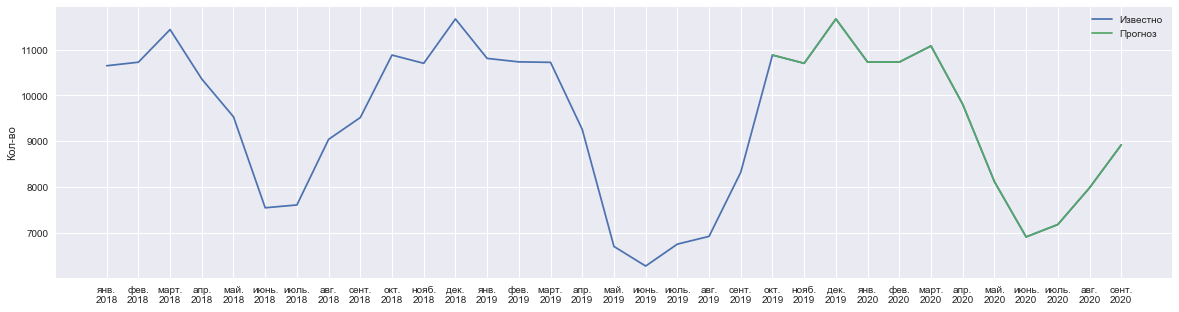

In [1368]:
fig, axes = plt.subplots(figsize = (20, 5))

# Вся кривая для отрисовки графика
to_plot=pd.concat([df_pred,df_next_month])[['Продажи']]

axes.plot(to_plot.values)
axes.plot(df_next_month[['Продажи']])

axes.set_xticks(range(len(to_plot)))
#  Устанавливаем подписи тиков
axes.set_xticklabels(['янв.\n2018', 'фев.\n2018',
                      'март.\n2018','апр.\n2018','май.\n2018',
                      'июнь.\n2018','июль.\n2018','авг.\n2018',
                      'сент.\n2018','окт.\n2018','нояб.\n2018','дек.\n2018',
                     'янв.\n2019', 'фев.\n2019',
                      'март.\n2019','апр.\n2019','май.\n2019',
                      'июнь.\n2019','июль.\n2019','авг.\n2019','сент.\n2019',
                      'окт.\n2019','нояб.\n2019','дек.\n2019',
                      'янв.\n2020', 'фев.\n2020',
                      'март.\n2020','апр.\n2020','май.\n2020',
                      'июнь.\n2020','июль.\n2020','авг.\n2020','сент.\n2020'])



axes.set_ylabel('Кол-во');
plt.legend(labels=['Известно','Прогноз']);
fig.savefig('img_RW/аптека/прогноз продаж')

In [1369]:
# Таблица для презентации
index_1 = pd.date_range('1/1/2018', '10/9/2020',freq='M')
to_plot=to_plot.set_index(pd.Index(index_1))
to_plot

,Продажи
2018-01-31,10648
2018-02-28,10725
2018-03-31,11437
2018-04-30,10358
2018-05-31,9535
2018-06-30,7551
2018-07-31,7613
2018-08-31,9043
2018-09-30,9519
2018-10-31,10881


ПОРГНОЗИРУЕМ ТРАФИК 

In [1374]:
# Беру часть со стабильным ростом
df_pred_traf=df_trafic.loc[13:].reset_index().drop(columns=['index'])
df_pred_traf

,month,year,sessions
0,2,2019,36949
1,3,2019,49040
2,4,2019,54564
3,5,2019,79334
4,6,2019,78370
5,7,2019,65280
6,8,2019,74641
7,9,2019,83797


In [1377]:
trafic_to_regr=df_pred_traf.sessions.values

In [1406]:
y=trafic_to_regr.reshape(-1, 1)
x=np.array(range(len(trafic_to_regr))).reshape(-1, 1)

In [1440]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics


# Обучение и прогноз на сырых данных
regressor = LinearRegression()  
regressor.fit(x, y)
y_pred_regress=regressor.predict(X_pred)

# Обучение и прогноз на данных без корр
regressor = LinearRegression()  
regressor.fit(x, y)
y_pred = regressor.predict(x_pred)

In [1441]:
y_pred=pd.DataFrame(y_pred,columns=['sessions'])
y_pred

,sessions
0,91342.857143
1,97141.964286
2,102941.071429
3,108740.178571
4,114539.285714
5,120338.392857
6,126137.500000
7,131936.607143


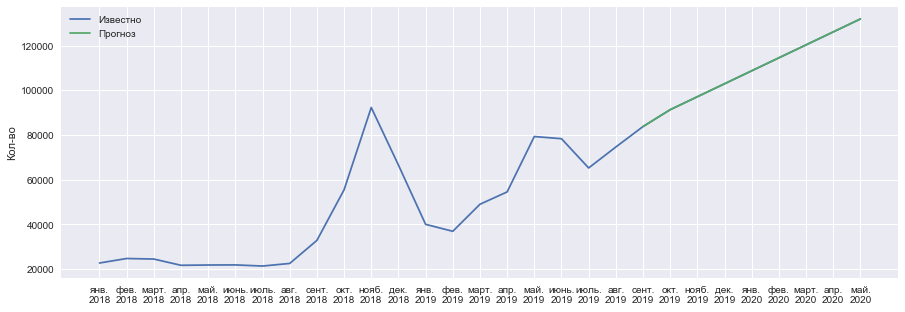

In [1446]:
fig, axes = plt.subplots(figsize = (15, 5))

# Вся кривая для отрисовки графика
to_plot=pd.concat([df_trafic[['sessions']],y_pred]).astype(int).reset_index().drop(columns=['index'])

axes.set_xticks(range(len(to_plot)))
#  Устанавливаем подписи тиков
axes.set_xticklabels(['янв.\n2018', 'фев.\n2018',
                      'март.\n2018','апр.\n2018','май.\n2018',
                      'июнь.\n2018','июль.\n2018','авг.\n2018',
                      'сент.\n2018','окт.\n2018','нояб.\n2018','дек.\n2018',
                     'янв.\n2019', 'фев.\n2019',
                      'март.\n2019','апр.\n2019','май.\n2019',
                      'июнь.\n2019','июль.\n2019','авг.\n2019','сент.\n2019',
                      'окт.\n2019','нояб.\n2019','дек.\n2019',
                      'янв.\n2020', 'фев.\n2020',
                      'март.\n2020','апр.\n2020','май.\n2020',
                      'июнь.\n2020','июль.\n2020','авг.\n2020','сент.\n2020'])

# Трафик
y1_to_plot=to_plot['sessions']

axes.plot(y1_to_plot)
axes.plot(to_plot[20:])


axes.set_ylabel('Кол-во');
plt.legend(labels=['Известно','Прогноз']);
fig.savefig('img_RW/аптека/рпогноз трафика')

In [1461]:
# Таблица для презентации
index_1 = pd.date_range('1/1/2018', '6/1/2020',freq='M')
to_plot=to_plot.set_index(pd.Index(index_1))
to_plot

,sessions
2018-01-31,22758
2018-02-28,24773
2018-03-31,24530
2018-04-30,21733
2018-05-31,21862
2018-06-30,21905
2018-07-31,21401
2018-08-31,22568
2018-09-30,32873
2018-10-31,55507
